# **Data Cleaning Main Datavista Based on Unit**

This is the initial stage of developing a room pricing model, where data reading and cleaning will be carried out from the main datavista using some packages and libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=FutureWarning)

### **Data Wrangling**

**Gathering Data**

In this stage, the datasets, namely datavista_unit are collected and then we will read the datasets using pandas library.

In [5]:
main_unit_df = pd.read_csv("unit.csv", delimiter=",")
main_unit_df.head()

,unit_id,average_baseline_price,number_of_bookings,property_id,bedroom,bathroom,beds,capacity,ac,balcony,...,private_entrance,shampoo,tv,washer,wifi,workspace,lat,lng,area_id,area_name
0,UN0026,388196.713861,98,PR0017,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,-8.656211,115.132867,A0003,Canggu
1,UN0027,432090.909091,33,PR0017,1.0,1.0,1.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,-8.656211,115.132867,A0003,Canggu
2,UN0043,727306.000000,5,PR0352,2.0,2.0,2.0,4.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,A0020,Nusa Penida
3,UN0120,394565.800452,34,PR0261,3.0,NaN,NaN,NaN,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,A0009,Balangan
4,UN0121,369575.785794,30,PR0261,1.0,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,A0009,Balangan


In [6]:
main_unit_df.shape

(880, 37)

It is observed that the unit data has a total of 880 rows and 37 features.

### **Assessing Data**

This is a process that aimed to identifying some issues related to data quality and we want to see the information of the data.

In [8]:
main_unit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unit_id                 880 non-null    object 
 1   average_baseline_price  880 non-null    float64
 2   number_of_bookings      880 non-null    int64  
 3   property_id             880 non-null    object 
 4   bedroom                 878 non-null    float64
 5   bathroom                582 non-null    float64
 6   beds                    582 non-null    float64
 7   capacity                523 non-null    float64
 8   ac                      539 non-null    float64
 9   balcony                 539 non-null    float64
 10  beachfront              539 non-null    float64
 11  breakfast               539 non-null    float64
 12  building_staff          539 non-null    float64
 13  cable_tv                539 non-null    float64
 14  essentials              539 non-null    fl

We see that the data types from datavista_unit dataset is correct, so we don't need to change the datatypes. Next we will check the data decription using describe function

In [10]:
main_unit_df.describe()

,average_baseline_price,number_of_bookings,bedroom,bathroom,beds,capacity,ac,balcony,beachfront,breakfast,...,parking,pool,private_entrance,shampoo,tv,washer,wifi,workspace,lat,lng
count,8.800000e+02,880.000000,878.000000,582.000000,582.000000,523.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,395.000000,395.000000
mean,9.004659e+05,59.296591,1.650342,1.109966,1.111684,2.476099,0.988868,0.486085,0.135436,0.482375,...,0.938776,0.766234,0.667904,0.630798,0.584416,0.055659,0.987013,0.881262,-8.666028,114.409762
std,8.106606e+05,81.652428,1.069775,0.807625,0.766938,1.319215,0.105016,0.500271,0.342507,0.500153,...,0.239964,0.423618,0.471403,0.483037,0.493280,0.229474,0.113323,0.323781,0.253054,4.179238
min,1.600500e+05,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.837896,79.230512
25%,4.111529e+05,13.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-8.811434,115.103201
50%,6.331550e+05,30.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-8.688604,115.131820
75%,1.108632e+06,73.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-8.653643,115.151234
max,8.677478e+06,1106.000000,8.000000,8.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-7.728722,115.586846


Next we will check is there any duplicates in datavista unit dataframe.

In [11]:
duplicate_count = main_unit_df.duplicated().sum()
print("Main unit dataset data duplicate count:", duplicate_count)

Main unit dataset data duplicate count: 1


After checking, it turns out there is one duplicate entry in the dataset, so the next step is to remove the duplicate data.

In [12]:
main_unit_df = main_unit_df.drop_duplicates()

Then we can check it again.

In [13]:
duplicate_count = main_unit_df.duplicated().sum()
print("Main unit dataset data duplicate count:", duplicate_count)

Main unit dataset data duplicate count: 0


After checking, it can be determined that the dataset do not have duplicates. Next we will check null values from dataset.

In [14]:
main_unit_df.isna().sum()

unit_id                     0
average_baseline_price      0
number_of_bookings          0
property_id                 0
bedroom                     2
bathroom                  298
beds                      298
capacity                  357
ac                        341
balcony                   341
beachfront                341
breakfast                 341
building_staff            341
cable_tv                  341
essentials                341
garden                    341
gym                       341
hair_dryer                341
hanger                    341
heating                   341
hot_water                 341
kitchen                   341
linens                    341
lock                      341
luggage_drop_off          341
parking                   341
pool                      341
private_entrance          341
shampoo                   341
tv                        341
washer                    341
wifi                      341
workspace                 341
lat       

After checking, it was found that there are many missing values in the data. The first thing we will do is handle the missing values in the bedroom feature, where we see there are only 2 missing values. Therefore, it is best to drop the rows where the bedroom feature is empty.

In [15]:
main_unit_df = main_unit_df.dropna(subset=['bedroom'])

Next we can check it again the missing values.

In [16]:
main_unit_df.isna().sum()

unit_id                     0
average_baseline_price      0
number_of_bookings          0
property_id                 0
bedroom                     0
bathroom                  296
beds                      296
capacity                  355
ac                        339
balcony                   339
beachfront                339
breakfast                 339
building_staff            339
cable_tv                  339
essentials                339
garden                    339
gym                       339
hair_dryer                339
hanger                    339
heating                   339
hot_water                 339
kitchen                   339
linens                    339
lock                      339
luggage_drop_off          339
parking                   339
pool                      339
private_entrance          339
shampoo                   339
tv                        339
washer                    339
wifi                      339
workspace                 339
lat       

We need to handle all missing values on the data, and also we want to know the correlation between features using correlation matrix to understand features relationship.

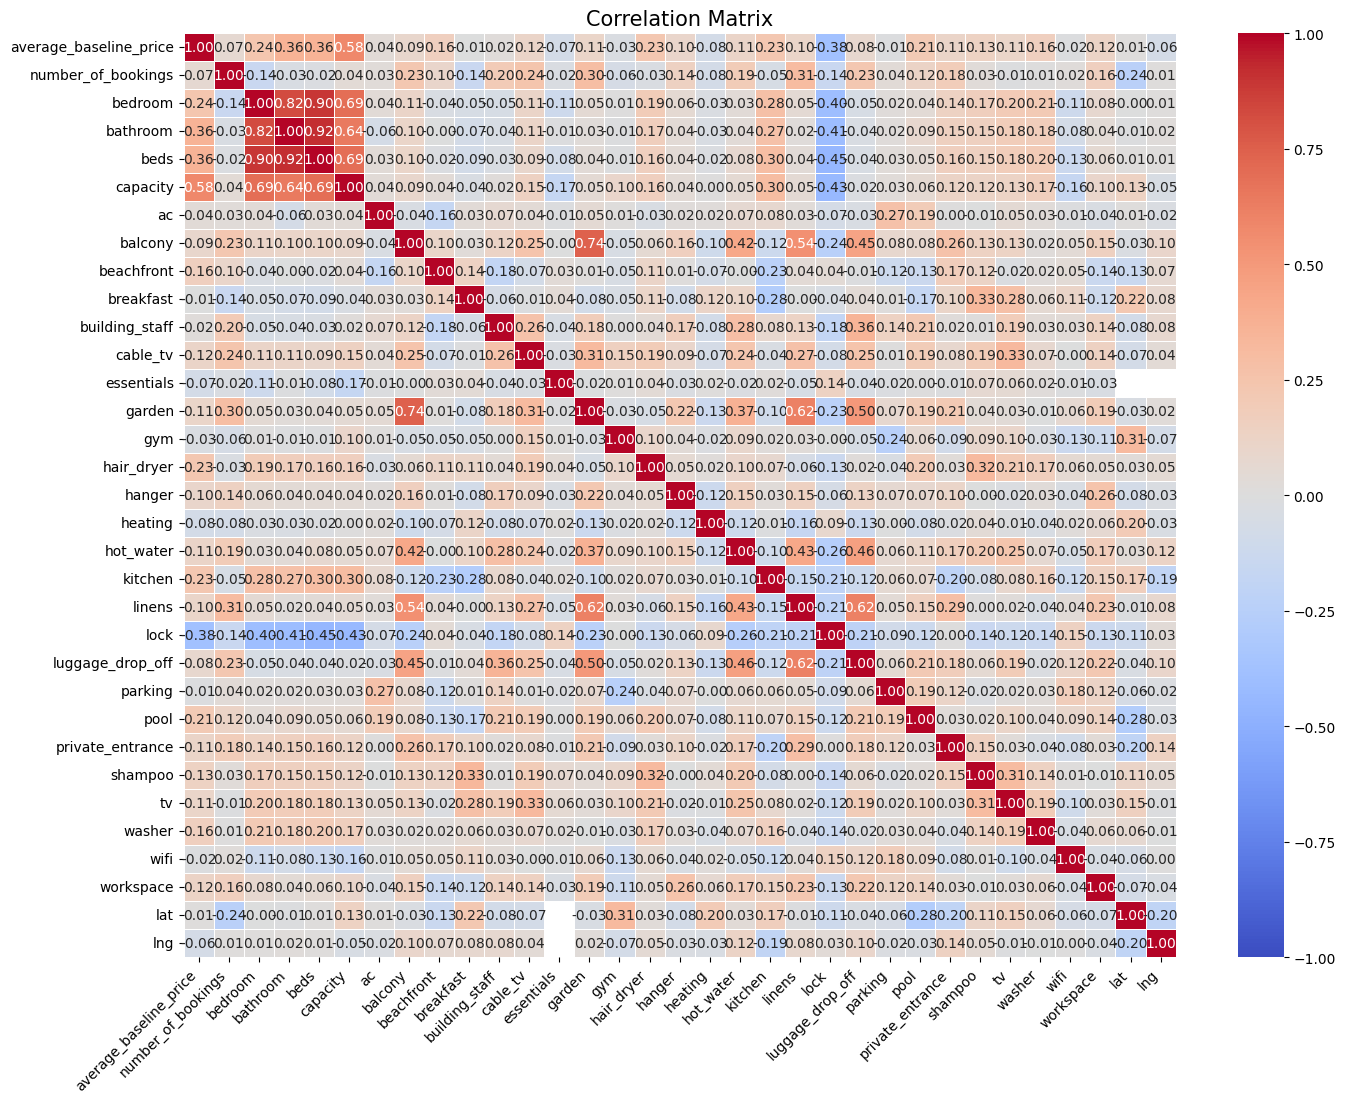

In [17]:
numeric_df = main_unit_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    fmt=".2f",
    annot_kws={"size": 10}
)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

Next we can see some features that have correlation score above the threshold.

In [18]:
threshold = 0.5
high_corr = np.where(np.abs(correlation_matrix) > threshold)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iat[x, y])
                   for x, y in zip(*high_corr) if x != y and x < y]

for pair in high_corr_pairs:
    print(f" {pair[0]} and {pair[1]} {pair[2]:.2f}")


 average_baseline_price and capacity 0.58
 bedroom and bathroom 0.82
 bedroom and beds 0.90
 bedroom and capacity 0.69
 bathroom and beds 0.92
 bathroom and capacity 0.64
 beds and capacity 0.69
 balcony and garden 0.74
 balcony and linens 0.54
 garden and linens 0.62
 garden and luggage_drop_off 0.50
 linens and luggage_drop_off 0.62


The next step is to define a function to fill null values using linear regression.

In [19]:
def impute_missing(df, target_col, feature_cols):
        """
        Impute missing values in target_col using feature_cols with Linear Regression.
        """

        train_data = df[df[target_col].notnull()]
        X_train = train_data[feature_cols]
        y_train = train_data[target_col]

        predict_data = df[df[target_col].isnull()]
        X_predict = predict_data[feature_cols]

        model = LinearRegression()
        model.fit(X_train, y_train)

        df.loc[df[target_col].isnull(), target_col] = np.round(model.predict(X_predict))

        return df

We will use that function to fill missing value on beds based on bedroom feature.

In [20]:
if main_unit_df['beds'].isnull().any():
      impute_missing(main_unit_df, 'beds', ['bedroom'])

Next step, we also use linear regression to fill missing value on bathroom based on bedroom and beds features.

In [21]:
if main_unit_df['bathroom'].isnull().any():
      impute_missing(main_unit_df, 'bathroom', ['beds','bedroom'])

Next, we can fill capacity based on average_baseline_price, bedroom, beds, and bathroom features using linear regression.

In [22]:
if main_unit_df['capacity'].isnull().any():
      impute_missing(main_unit_df, 'capacity', ['beds','bedroom','bathroom','average_baseline_price'])

Next we can check another missing values on dataset.

In [23]:
main_unit_df.isna().sum()

unit_id                     0
average_baseline_price      0
number_of_bookings          0
property_id                 0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
ac                        339
balcony                   339
beachfront                339
breakfast                 339
building_staff            339
cable_tv                  339
essentials                339
garden                    339
gym                       339
hair_dryer                339
hanger                    339
heating                   339
hot_water                 339
kitchen                   339
linens                    339
lock                      339
luggage_drop_off          339
parking                   339
pool                      339
private_entrance          339
shampoo                   339
tv                        339
washer                    339
wifi                      339
workspace                 339
lat       

We can see the description of the dataset.

In [24]:
main_unit_df.describe()

,average_baseline_price,number_of_bookings,bedroom,bathroom,beds,capacity,ac,balcony,beachfront,breakfast,...,parking,pool,private_entrance,shampoo,tv,washer,wifi,workspace,lat,lng
count,8.770000e+02,877.000000,877.000000,877.000000,877.000000,877.000000,538.000000,538.000000,538.000000,538.000000,...,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,392.000000,392.000000
mean,8.992695e+05,59.360319,1.651083,1.586089,1.587229,2.946408,0.988848,0.486989,0.135688,0.483271,...,0.938662,0.765799,0.669145,0.631970,0.585502,0.055762,0.986989,0.881041,-8.670441,114.428558
std,8.112817e+05,81.782372,1.070160,1.150119,1.131016,1.436034,0.105112,0.500296,0.342775,0.500185,...,0.240173,0.423892,0.470959,0.482718,0.493094,0.229675,0.113427,0.324042,0.246431,4.185057
min,1.600500e+05,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.837896,79.230512
25%,4.089406e+05,13.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-8.812221,115.103201
50%,6.330867e+05,30.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-8.688708,115.131828
75%,1.105006e+06,73.000000,2.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-8.654192,115.151234
max,8.677478e+06,1106.000000,8.000000,8.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-7.728722,115.586846


After reviewing the data description, we realized that the features from `ac` to `workspace` have categorical values of 0 or 1, with a total of 339 missing values.

In [39]:
main_unit_df['lat'].fillna('undefined', inplace=True)
main_unit_df['lng'].fillna('undefined', inplace=True)

Next we can fill missing values on categorical data using Mode.

In [41]:
columns_with_nan = main_unit_df.columns[main_unit_df.isna().any()].tolist()

for column in columns_with_nan:
    mode_value = main_unit_df[column].mode()[0]
    main_unit_df[column].fillna(mode_value, inplace=True)

In [42]:
main_unit_df.isna().sum()

unit_id                   0
average_baseline_price    0
number_of_bookings        0
property_id               0
bedroom                   0
bathroom                  0
beds                      0
capacity                  0
ac                        0
balcony                   0
beachfront                0
breakfast                 0
building_staff            0
cable_tv                  0
essentials                0
garden                    0
gym                       0
hair_dryer                0
hanger                    0
heating                   0
hot_water                 0
kitchen                   0
linens                    0
lock                      0
luggage_drop_off          0
parking                   0
pool                      0
private_entrance          0
shampoo                   0
tv                        0
washer                    0
wifi                      0
workspace                 0
lat                       0
lng                       0
area_id             

In [43]:
main_unit_df.head()

,unit_id,average_baseline_price,number_of_bookings,property_id,bedroom,bathroom,beds,capacity,ac,balcony,...,private_entrance,shampoo,tv,washer,wifi,workspace,lat,lng,area_id,area_name
0,UN0026,388196.713861,98,PR0017,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,-8.656211,115.132867,A0003,Canggu
1,UN0027,432090.909091,33,PR0017,1.0,1.0,1.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,-8.656211,115.132867,A0003,Canggu
2,UN0043,727306.000000,5,PR0352,2.0,2.0,2.0,4.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,undefined,undefined,A0020,Nusa Penida
3,UN0120,394565.800452,34,PR0261,3.0,3.0,3.0,4.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,undefined,undefined,A0009,Balangan
4,UN0121,369575.785794,30,PR0261,1.0,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,undefined,undefined,A0009,Balangan
